## Car Price Prediction

In this project, I aim to build a machine learning model that predicts the price of a used car based on various features like car brand, mileage, horsepower, fuel type, and more.

**Goal**: Predict car prices using supervised learning techniques (regression).

**Dataset**: [Car Price Prediction from Kaggle](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)


In [1]:
# Importing Libraries

# Data Handling
import pandas as pd         # Work with tabular data
import numpy as np          # Numerical operations

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')  # Consistent plot style


# Statistical tools
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Preprocessing tools
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Miscellaneous Settings
import warnings
warnings.filterwarnings('ignore')  # Suppress unnecessary warnings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

These imports the librabries needed for this project. **Pandas** and **NumPy** for data handling, **Matplotlib** and **Seaborn** for plots, preprocessing with **LabelEncoder** and **StandardScaler**, model building with **LinearRegression**, and evaluation using **MAE**, **MSE**, and **R²**. It also hides warnings and makes pandas show all rows and columns for easier viewing.


### Load Data

In [3]:
# Load the dataset from a CSV file
df = pd.read_csv('CarPrice_Assignment.csv')

# Display the first 5 rows of the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


This code loads the car price dataset into a pandas DataFrame using `read_csv()` and shows the first five rows with `head()` to get a quick look at the data’s structure and contents.

In [4]:
# Check the dataset size (rows & columns)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 205 rows and 26 columns


#### Observations:
This code prints the dataset’s shape, showing it has **205 rows** (records) and **26 columns** (features).

In [5]:
# Get summary info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

This command shows a quick summary of the dataset, listing all **26 columns**, their **data types** (numeric or object), and confirming there are **205 entries** with no missing values.

In [6]:
# View summary statistics for all numeric columns (transposed for readability)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


This shows quick stats for numeric columns, including **count, mean, min, max, and quartiles**, helping spot trends.

**Observations**:
- The `price` column ranges from **5,118 to 45,400**, indicating a wide price spread from budget to luxury cars.
- `compressionratio` shows unusually high values (up to 23.0), suggesting potential **outliers**.
- Most other numerical features (like `wheelbase`, `carlength`, `carwidth`) fall within expected ranges but also have occasional extreme values.


In [7]:
# Check each column for missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

This checks for missing data in all columns.

**Observations**:
- All columns have **0 missing values**.
- No need for imputation or dropping rows meaning the dataset is already clean.


In [8]:
# Check for duplicate rows in the dataset
df.duplicated().sum()

0

This checks if there are any duplicate rows.

**Observations**:
- No duplicate rows were found.
- This means every car entry is unique in the dataset.


In [9]:
# Remove the 'car_ID' column
df.drop('car_ID', axis=1, inplace=True)

This removes the car_ID column because it’s just an identifier and doesn’t add any predictive value for the model.

In [10]:
# Extract the car brand from 'CarName' and make it lowercase
df['brand'] = df['CarName'].apply(lambda x: x.split()[0].lower())

# Drop 'CarName' since brand info is now separated
df.drop('CarName', axis=1, inplace=True)

This splits CarName into the **car brand** (in lowercase) and drops the original column, keeping only useful brand info for analysis.

**Observations**:
- A new column `brand` was created by splitting the `CarName` field.
- This helps us analyze and model car prices **by brand** instead of long combined names.


In [11]:
# Check for misspelled or inconsistent brand names
df['brand'].value_counts()

brand
toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
mercury         1
porcshce        1
Name: count, dtype: int64

This lists all car brands and their counts, helping spot spelling errors like **“maxda”**, **“porcshce”**, and **“toyouta”** that should be corrected for consistency.

In [12]:
# Correct misspelled brand names for consistency
df['brand'].replace({'vw':'volkswagen', 'vokswagen':'volkswagen', 'toyouta':'toyota',
                     'porcshce':'porsche', 'maxda':'mazda'}, inplace=True)


This fixes spelling mistakes in the **brand** column:
- Corrected misspellings like `vokswagen` to `volkswagen`, `toyouta` to `toyota`, etc.
- Ensures consistent branding, avoiding splitting the same car brand into multiple categories.


### Exploratory Data Analysis (EDA)
#### Univariate Analysis

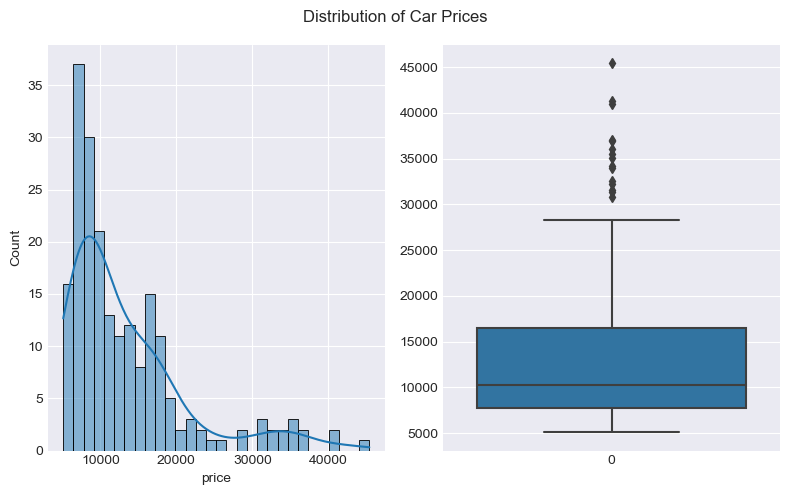

In [13]:
# Visualize the distribution of car prices
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(8,5))

# Histogram with KDE to show price distribution
sns.histplot(df['price'], kde=True, bins=30, ax=ax[0])

# Boxplot to show spread and detect outliers
sns.boxplot(df['price'], ax=ax[1])

# Add title and adjust layout
fig.suptitle('Distribution of Car Prices')
plt.tight_layout()
plt.show()

This code plots a **histogram** (with KDE curve) to show how car prices are distributed and a boxplot to highlight the price range and outliers in the dataset.

**Observations**:
- The price distribution is **right-skewed**, with most cars priced between **7k–15k**.
- Some **luxury cars** above 30k are visible as **outliers** in the boxplot.
- This skewness might influence the regression model’s performance.


In [14]:
# Select only numeric columns
num_cols = df.select_dtypes(exclude=['object']).columns

# Remove the target column 'price' from the list
num_cols = num_cols[:-1]

# Print the list of numeric columns
print("Numerical Columns:", num_cols.tolist())


Numerical Columns: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


This identifies all **numeric columns** in the dataset (except price), giving a list of features like wheelbase, enginesize, and horsepower for further analysis.

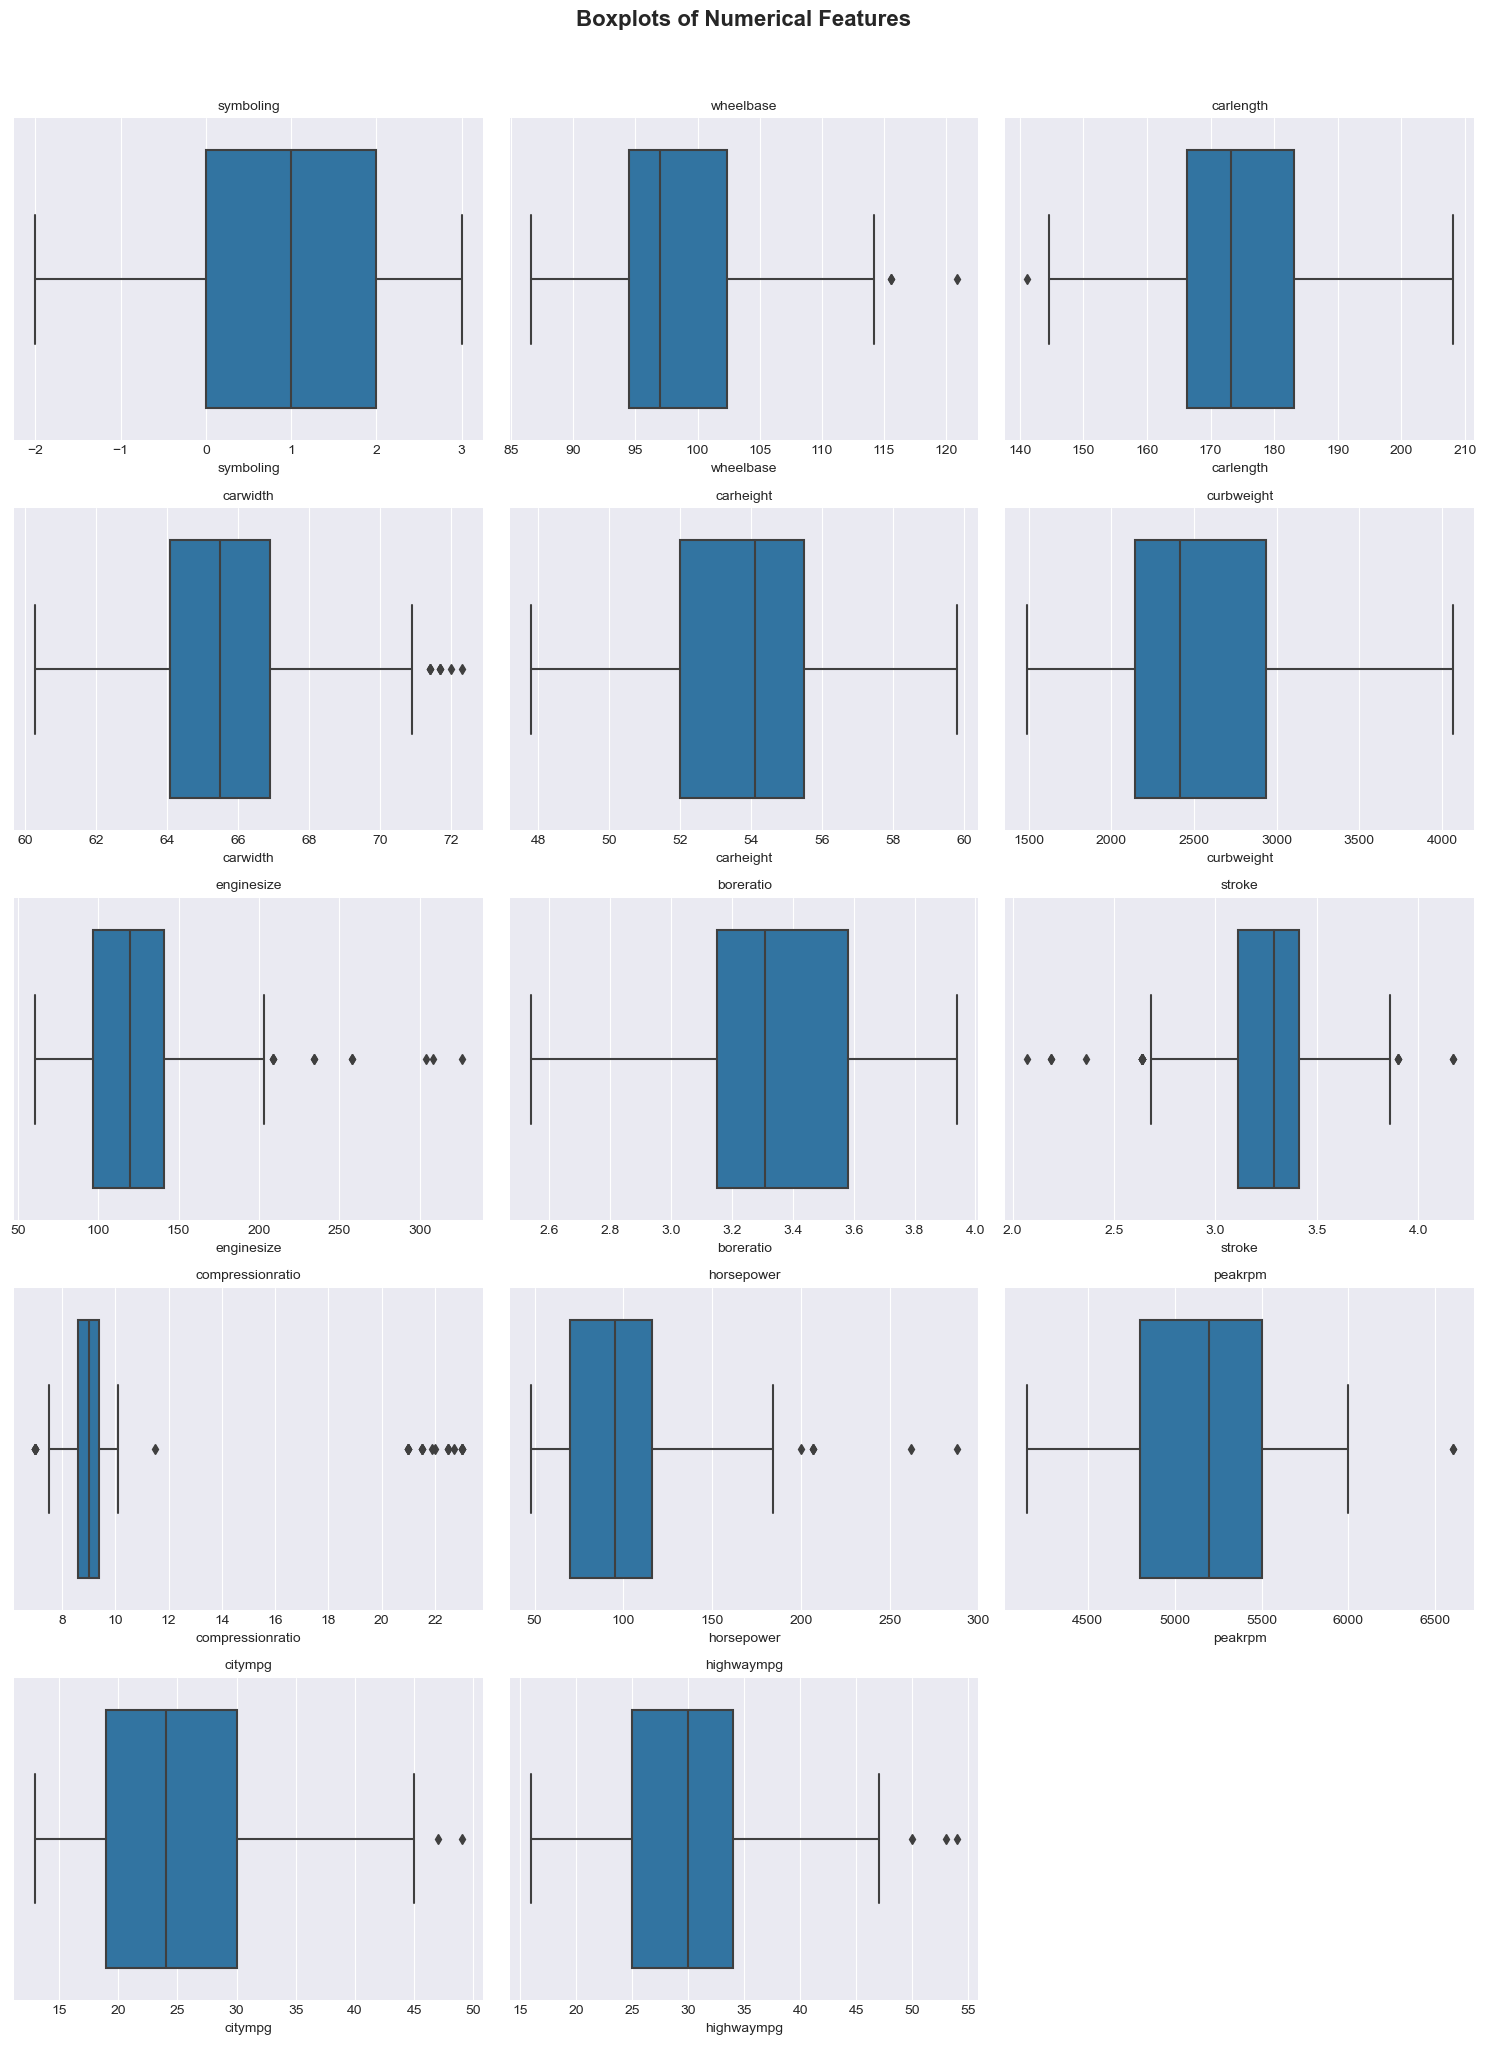

In [15]:
# Create boxplots for all numerical features

n = len(num_cols)                   # Number of numeric columns
cols = 3                            # Number of plots per row
rows = (n + cols - 1) // cols       # Calculate how many rows are needed

# Set up figure grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
fig.suptitle('Boxplots of Numerical Features', fontsize=16, fontweight='bold', y=1.02)

# Loop through each numerical column and plot its boxplot
for i, col in enumerate(num_cols):
    r = i // cols
    c = i % cols
    sns.boxplot(x=df[col], ax=axes[r][c])
    axes[r][c].set_title(col, fontsize=10)

# Hide any empty subplots (if the grid is larger than needed)
for j in range(i + 1, rows * cols):
    r = j // cols
    c = j % cols
    axes[r][c].set_visible(False)

plt.tight_layout()
plt.show()

This code creates **boxplots** for all numeric columns in a grid layout, making it easy to **spot outliers** and compare the spread of values across different features at a glance.

**Observations**:
- Outliers are noticeable in columns like:
  - `enginesize`
  - `compressionratio`
  - `horsepower`
- Other features (e.g., `symboling`, `carheight`) show minimal or no extreme outliers.

In [16]:
# Select only categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Print the list of categorical columns
print("Categorical Columns:", cat_cols.tolist())

Categorical Columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']


This identifies all **categorical columns** in the dataset like fueltype, carbody, and brand which will be useful for encoding and analysis later.

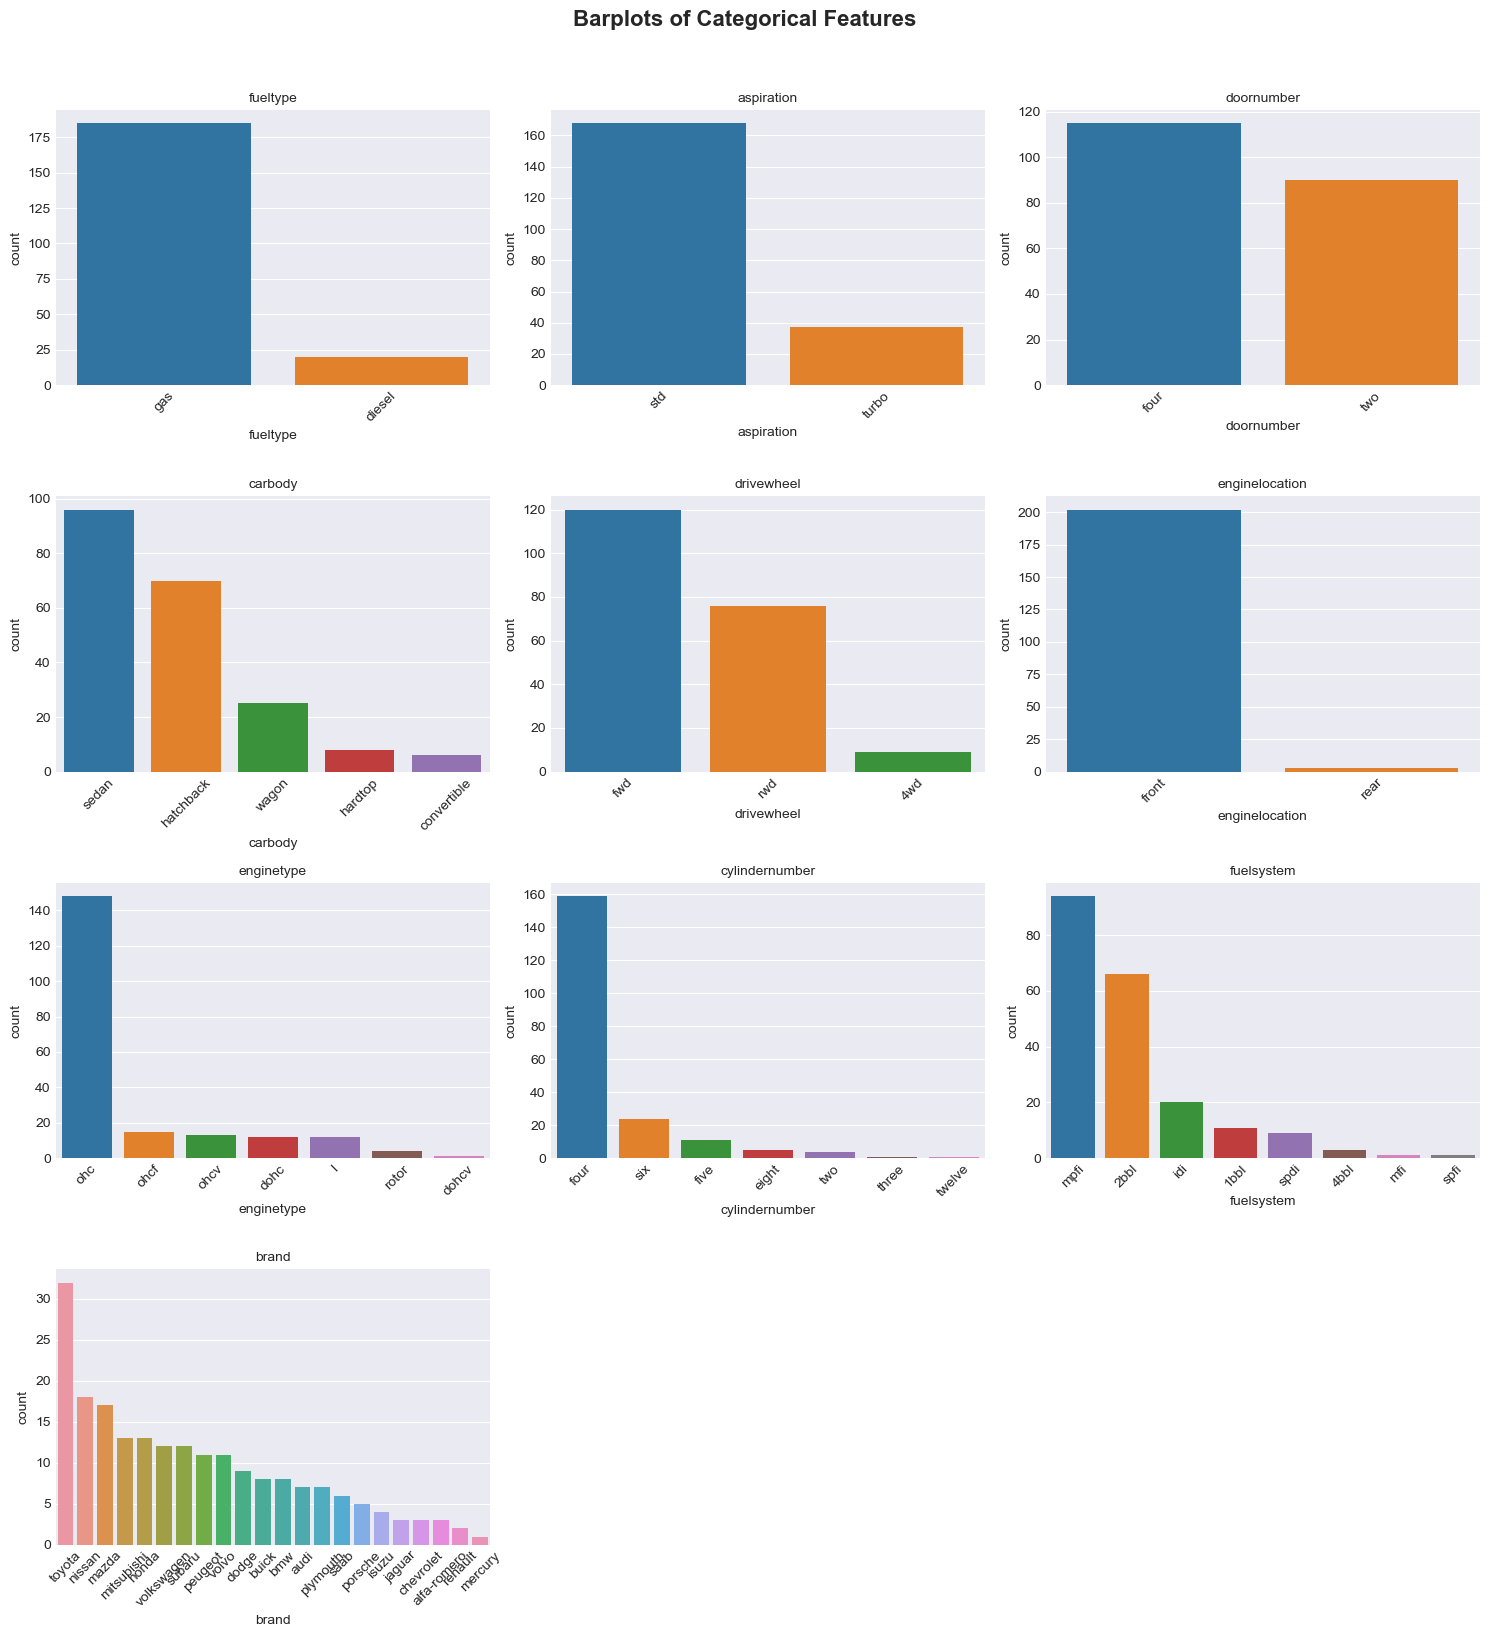

In [17]:
# Create barplots for all categorical features

n = len(cat_cols)                   # Number of categorical columns
cols = 3                            # Number of plots per row
rows = (n + cols - 1) // cols       # Calculate number of rows

# Set up the figure grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
fig.suptitle('Barplots of Categorical Features', fontsize=16, fontweight='bold', y=1.02)

# Loop through each categorical column to create a barplot
for i, col in enumerate(cat_cols):
    r = i // cols
    c = i % cols
    sns.countplot(data=df, x=col, ax=axes[r][c], order=df[col].value_counts().index)
    axes[r][c].set_title(col, fontsize=10)
    axes[r][c].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Hide any unused subplot spaces
for j in range(i + 1, rows * cols):
    r = j // cols
    c = j % cols
    axes[r][c].set_visible(False)

plt.tight_layout()
plt.show()

This code creates **barplots** for every categorical feature, showing the frequency of each category. The grid layout makes it easy to compare distributions across all categorical variables at once.

**Observations**:
- Most cars use **gas** fuel type, and `ohc` is the most common engine type.
- Some brands (Toyota, Nissan, Mazda) dominate the dataset.
- Useful for understanding which categories might strongly influence price.


In [18]:
# Function to cap (limit) outliers using Winsorization
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)         # First quartile
    Q3 = df[column].quantile(0.75)         # Third quartile
    IQR = Q3 - Q1                          # Interquartile range
    lower_bound = Q1 - 1.5 * IQR           # Lower limit for outliers
    upper_bound = Q3 + 1.5 * IQR           # Upper limit for outliers

    # Replace values below lower_bound or above upper_bound with the bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound,
                                   upper_bound, df[column]))
    return df

# Apply outlier capping to selected numerical columns
outlier_cols = ['wheelbase', 'carlength', 'carwidth', 'enginesize',
                'stroke', 'compressionratio', 'horsepower',
                'peakrpm', 'citympg', 'highwaympg']

for col in outlier_cols:
    df = cap_outliers(df, col)


This defines a function to **cap extreme outliers** using the **IQR method (Winsorization)** and applies it to key numeric columns like enginesize, horsepower, and citympg to keep data within a reasonable range for modeling.

In [19]:
# Encode categorical columns for modeling

# Convert words in 'doornumber' to numbers
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})

# Convert cylinder words to numeric values
df['cylindernumber'] = df['cylindernumber'].map({
    'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'eight': 8, 'twelve': 12
})

# Label encode binary columns (0/1)
le = LabelEncoder()
for col in ['fueltype', 'aspiration', 'enginelocation']:
    df[col] = le.fit_transform(df[col])

# One-Hot Encode multi-category columns (drop_first avoids dummy trap)
df = pd.get_dummies(df,
                    columns=['carbody', 'drivewheel', 'fuelsystem', 'brand', 'enginetype'],
                    drop_first=True,
                    dtype=int)

# Preview the updated dataset
df.head()


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,brand_audi,brand_bmw,brand_buick,brand_chevrolet,brand_dodge,brand_honda,brand_isuzu,brand_jaguar,brand_mazda,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,1,0,2,0,88.6,168.8,64.1,48.8,2548,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,0,2,0,88.6,168.8,64.1,48.8,2548,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,2,0,94.5,171.2,65.5,52.4,2823,6,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,1,0,4,0,99.8,176.6,66.2,54.3,2337,4,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2,1,0,4,0,99.4,176.6,66.4,54.3,2824,5,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


This code **encodes all categorical data** for machine learning:

- `doornumber` and `cylindernumber` converted to numeric values.
- Binary columns (`fueltype`, `aspiration`, `enginelocation`) were label-encoded.
- Multi-category columns (e.g., `brand`, `carbody`) were one-hot encoded.
- Dataset is now fully **numeric** and ready for modeling.


### Feature Selection

Top correlations with price:
price             1.000000
enginesize        0.854532
curbweight        0.835305
horsepower        0.809985
carwidth          0.753383
cylindernumber    0.718305
carlength         0.682920
drivewheel_rwd    0.638957
wheelbase         0.566761
boreratio         0.553173
Name: price, dtype: float64


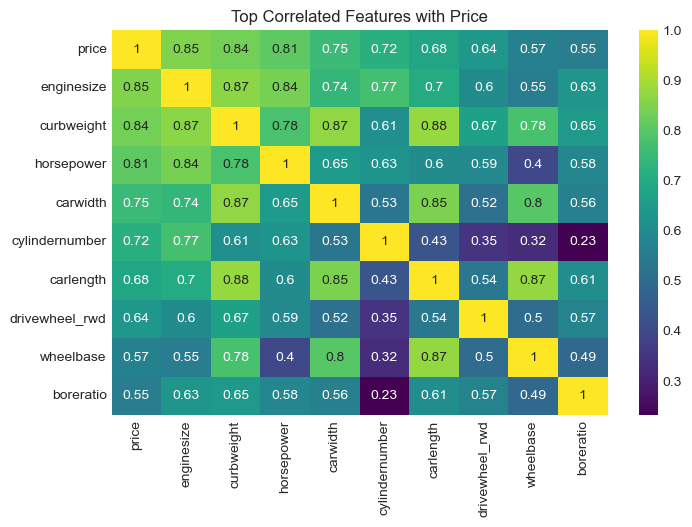

In [20]:
# 📊 Calculate correlations with the target (price)
corr_matrix = df.corr(numeric_only=True)            # Correlation matrix for numeric columns
price_corr = corr_matrix['price'].sort_values(ascending=False)  # Sort by correlation with price

# 🏆 Show top 10 most correlated features with price
print("Top correlations with price:")
print(price_corr.head(10))

# 🎨 Visualize these top correlations in a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[price_corr.head(10).index].corr(), annot=True, cmap='viridis')
plt.title("Top Correlated Features with Price")
plt.show()

This code finds and sorts features by how strongly they **correlate with car price**, showing that :
- Strongest positive correlations:
  - `enginesize (0.85)`, `curbweight (0.83)`, `horsepower (0.80)`.
- Insight: Bigger engines, heavier cars, and higher horsepower generally lead to **higher prices**.


In [21]:
# Calculate Variance Inflation Factor (VIF) to check for multicollinearity

# Select only numeric features (drop the target 'price')
X_num = df.select_dtypes(include=[np.number]).drop('price', axis=1)

# Add constant column for intercept (required for VIF calculation)
X_num_const = add_constant(X_num)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num_const.values, i+1) for i in range(len(X_num.columns))]

# View features sorted by highest VIF
print(vif_data.sort_values(by="VIF", ascending=False))

              Feature        VIF
56    enginetype_ohcf        inf
1            fueltype        inf
4      enginelocation        inf
27     fuelsystem_idi        inf
49       brand_subaru        inf
9          curbweight  51.703251
11         enginesize  47.104975
15         horsepower  42.851012
17            citympg  41.634867
29    fuelsystem_mpfi  41.285460
18         highwaympg  35.607705
25    fuelsystem_2bbl  32.802422
44      brand_peugeot  32.755470
54       enginetype_l  22.602435
6           carlength  22.234879
21      carbody_sedan  22.220860
50       brand_toyota  19.539848
24     drivewheel_rwd  19.527902
5           wheelbase  19.152471
37        brand_honda  18.847911
20  carbody_hatchback  17.143212
10     cylindernumber  14.848950
7            carwidth  14.461234
43       brand_nissan  13.664126
42   brand_mitsubishi  13.621726
40        brand_mazda  13.393313
52        brand_volvo  12.730490
23     drivewheel_fwd  12.664204
55     enginetype_ohc  12.258364
22      ca

This code calculates the **Variance Inflation Factor (VIF)** for numeric features to detect **multicollinearity** which means when features are highly correlated with each other. Several features (e.g., curbweight, enginesize, horsepower) had very high VIF (> 40) which suggest redundant features that could distort the model and might need removal or combination.

In [22]:
# Choose the most relevant features for the model
selected_features = [
    'enginesize', 'curbweight', 'carwidth', 'cylindernumber',
    'carlength', 'drivewheel_rwd', 'wheelbase', 'boreratio',
    'highwaympg', 'brand_buick'
]


This defines the **final list of features** to use for modeling:
- Features that balance:
  - High correlation with price.
  - Lower multicollinearity.
- Helps improve model stability and interpretability.


### Build Model

In [23]:
# Split the dataset into features (X) and target (y)
X = df[selected_features]
y = df['price']

# Divide into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit only on training data
X_test_scaled = scaler.transform(X_test)         # Apply same scaling to test set


**Train-Test Split & Scaling**:
- Data split into **80% training** and **20% testing**.
- StandardScaler was applied to normalize features.
- Ensures all features are on the **same scale**, improving model performance.


In [24]:
# Initialize and train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predict prices on train & test sets
y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

# Preview first 5 predictions from each set
print("Train Predictions:", y_train_pred[:5])
print("Test Predictions:", y_test_pred[:5])

Train Predictions: [13029.91662747 16680.16525872  6704.16989223  6702.05833838
  9429.72864844]
Test Predictions: [24363.51079353 16826.30418805 10007.86946238 12765.72022098
 31077.63104518]


**Linear Regression**:
- Model trained successfully and made predictions on training and testing data.
- Predictions are reasonable, though very high-end cars might still be slightly off due to the dataset’s skew.


In [25]:
# Evaluate the model’s performance using key metrics

# Calculate R² scores (how well the model explains variance)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Print performance summary
print("Linear Regression Performance:")
print(f"R² (Train): {train_r2:.3f}")
print(f"R² (Test): {test_r2:.3f}")
print(f"MAE (Train): {train_mae:.2f}")
print(f"MAE (Test): {test_mae:.2f}")
print(f"RMSE (Train): {train_rmse:.2f}")
print(f"RMSE (Test): {test_rmse:.2f}")

Linear Regression Performance:
R² (Train): 0.821
R² (Test): 0.823
MAE (Train): 2268.42
MAE (Test): 2510.33
RMSE (Train): 3268.55
RMSE (Test): 3735.44


This code evaluates the **Linear Regression model** using **R²**, **MAE**, and **RMSE** for both training and test sets.

**Observations**:
- R² (Train): 0.821 | R² (Test): 0.823 means Model explains ~82% of price variability.
- MAE ~ \$2,510 means that the average prediction error is around **$2.5k**.
- Performance is solid for a **linear regression model**.


In [26]:
# Inspect feature coefficients to understand feature importance
coeffs = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': lin_reg.coef_
}).sort_values(by='Coefficient', ascending=False)

# Print the coefficients sorted from highest to lowest
print("\nFeature Coefficients:")
print(coeffs)



Feature Coefficients:
          Feature  Coefficient
0      enginesize  1743.821126
2        carwidth  1616.100992
3  cylindernumber  1511.274525
5  drivewheel_rwd  1233.222255
9     brand_buick  1087.990760
1      curbweight  1070.085287
7       boreratio   262.382737
4       carlength   188.995822
8      highwaympg  -877.291625
6       wheelbase  -949.766922


This displays the **model coefficients**, showing how each feature impacts price:

- Positive coefficients (e.g., enginesize, carwidth) **increase** price.

- Negative coefficients (e.g., highwaympg, wheelbase) **lower** price.

It helps explain which features most strongly drive car prices.

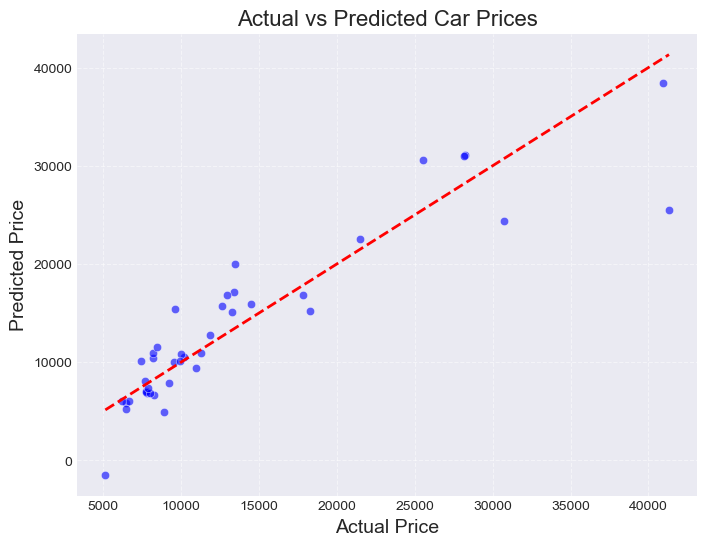

In [27]:
# Create a DataFrame to compare actual and predicted prices
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Plot Actual vs Predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df,
                color='blue', alpha=0.6)

# Add a red dashed line showing the ideal 1:1 prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)

# 🏷️ Add labels, title, and grid
plt.title('Actual vs Predicted Car Prices', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

This plot compares **actual car prices** to **predicted prices** from the model.

- Each **blue dot** represents a car.

- The **red dashed line** shows perfect predictions (where actual = predicted).

The closer the points are to the red line, the **more accurate** the model’s predictions

**Observations**:
- Most points lie near the **red diagonal line** means good prediction alignment.
- Some deviations for **luxury cars** suggest room for improvement.


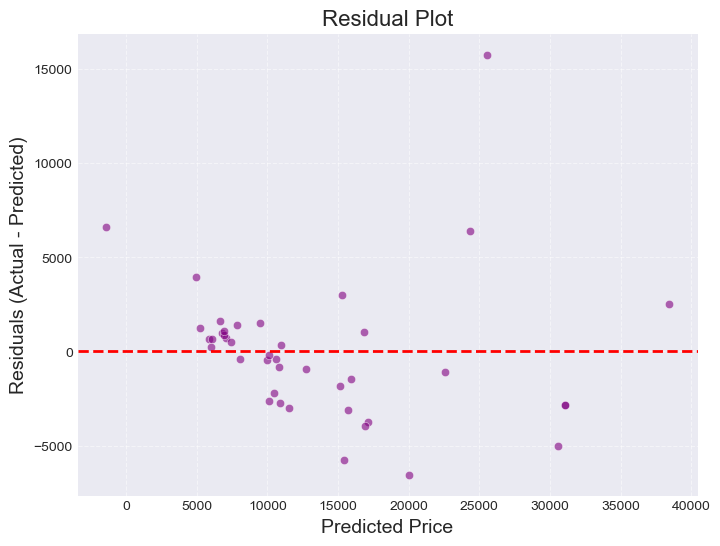

In [28]:
# Calculate residuals (Actual - Predicted)
residuals = y_test - y_test_pred

# Plot residuals against predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_pred, y=residuals, color='purple', alpha=0.6)

# Add a horizontal line at 0 (perfect predictions)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

This **residual plot** shows how well the model predicts car prices:

- **Dots near the red dashed line** mean the predictions are close to the actual prices.

- **Random scatter** around the red line indicates the model is fairly unbiased.

**Observations**:
- Residuals mostly center around **zero**, indicating a good fit.
- A few points stray far which are mainly luxury car outliers.
- Suggests the model works well but might benefit from a **non-linear model** for extreme values.
